In [1]:
from scripts.make_dataset import remove_corrupted_duplicates_and_rename_images, split_dataset, crop_augment_images_for_svc, split_dataset_for_svc
from scripts.build_features import build_features_svc
from scripts.model import train_yolo, train_svc, predict_naive_evaluate_test_set

from scripts.model import predict_yolo_single_image, predict_svc_single_image
from ultralytics import YOLO
import cv2
import joblib
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# A. Get Dataset

# Step A1: Gather the raw dataset from Google Maps
# Gather images with metro station signages from Google Maps/Photos (approx 100 photos per station) and save them in the data/raw folder.

# List of station folder names corresponding to the 8 stations in the BTS Silom Line (Dark Green Line without extension)
station_folder_name = [
    "Siam",
    "National_Stadium", 
    "Ratchadamri", 
    "Sala_Daeng", 
    "Chong_Nonsi", 
    "Saint_Louis", 
    "Surasak", 
    "Saphan_Taksin"
]

# Step A2: Remove corrupted images, duplicates, and rename images, then save them in the data/processed_before_roboflow folder
# This step was done before uploading to Roboflow, so it should be commented out if the annotated dataset exported from Roboflow is ready for the next step.
remove_corrupted_duplicates_and_rename_images(station_folder_name)

# Step A3: Upload the dataset to Roboflow, annotate the images, draw bounding boxes manually, and then export the dataset in YOLO format.
# Put the exported dataset in the data/processed folder.

Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(13).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(18).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(37).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(38).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(39).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(44).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(45).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(53).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(55).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(59).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(62).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(63).png
Duplicate: data\raw\National_Stadium\National-Stadium-Google-Maps(65).png
Duplicate: data\raw\National_Stadium\N

In [3]:
# Step A4: Split the dataset into training, validation, and test sets, then save them in the data/outputs folder.
split_dataset(station_folder_name)

Stratified split complete.


In [4]:
# List of labels/folders corresponding to YOLO class IDs (folder names have underscores while YOLO class IDs do not)
label_map = {
    0: 'Chong_Nonsi', 
    1: 'National_Stadium',
    2: 'Ratchadamri', 
    3: 'Saint_Louis', 
    4: 'Sala_Daeng', 
    5: 'Saphan_Taksin', 
    6: 'Siam', 
    7: 'Surasak'
}

# Step A5: Crop the images in the training, validation, and test sets to create a new dataset with only the metro station signage. This is for the SVC model.
crop_augment_images_for_svc(label_map)

[train] Extracted 1059 cropped signage images.
[train] Skipped images (too small):
  Chong_Nonsi: 3 skipped
  National_Stadium: 8 skipped
  Ratchadamri: 6 skipped
  Saint_Louis: 3 skipped
  Sala_Daeng: 8 skipped
  Saphan_Taksin: 0 skipped
  Siam: 7 skipped
  Surasak: 2 skipped
[valid] Extracted 129 cropped signage images.
[valid] Skipped images (too small):
  Chong_Nonsi: 0 skipped
  National_Stadium: 2 skipped
  Ratchadamri: 2 skipped
  Saint_Louis: 0 skipped
  Sala_Daeng: 1 skipped
  Saphan_Taksin: 0 skipped
  Siam: 0 skipped
  Surasak: 0 skipped
[test] Extracted 139 cropped signage images.
[test] Skipped images (too small):
  Chong_Nonsi: 0 skipped
  National_Stadium: 0 skipped
  Ratchadamri: 1 skipped
  Saint_Louis: 1 skipped
  Sala_Daeng: 0 skipped
  Saphan_Taksin: 0 skipped
  Siam: 3 skipped
  Surasak: 1 skipped


In [5]:
# Step A6: Build features and labels for SVC model
features_by_split, labels_by_split = build_features_svc()

[RESULT] train: 6354 samples
[RESULT] valid: 774 samples
[RESULT] test: 834 samples


In [10]:
# Step A7: Prepare the training and test data for SVC model
X_train_full_scaled, y_train_full, X_test_scaled, y_test = split_dataset_for_svc(features_by_split, labels_by_split)

In [11]:
# B. Train YOLOv8 and SVC models

# Step B1: Train YOLOv8 model for detecting Bangkok Metro Station Signage
best_yolo_model, yolo_metrics = train_yolo(epochs=200, img_size=960, batchsize=16, device='cuda')

New https://pypi.org/project/ultralytics/8.3.152 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.150  Python-3.10.11 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/outputs/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=training_results, nbs=64, nms=False, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 8.79MB/s]
c:\Users\beung-yoga\Documents\GitHub4\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 1293.1474.1 MB/s, size: 131.8 KB)


train: Scanning C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\train\labels... 704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 704/704 [00:00<00:00, 2681.44it/s]


train: New cache created: C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 666.7208.1 MB/s, size: 108.8 KB)


val: Scanning C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\valid\labels... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<00:00, 1912.36it/s]

val: New cache created: C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\valid\labels.cache


Plotting labels to models\deep_learning\training_results\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to models\deep_learning\training_results
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.51G      1.297      5.556      1.398         52        960: 100%|██████████| 44/44 [00:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         89        134    0.00358      0.623     0.0529     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.63G      1.074      4.364      1.196         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         89        134      0.123      0.218     0.0908     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.63G      1.013      3.856      1.168         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         89        134      0.112      0.271     0.0891     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.63G      1.038      3.607      1.176         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         89        134      0.155      0.272      0.144      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      4.63G      1.033      3.414      1.166         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.411      0.231      0.252      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.63G      1.017      3.208      1.161         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.314      0.214      0.243      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.63G     0.9438      2.919      1.111         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         89        134      0.269      0.385      0.274      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.63G      0.947      2.748      1.112         36        960: 100%|██████████| 44/44 [00:15<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         89        134      0.408      0.461       0.32      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.63G     0.8837      2.602      1.084         52        960: 100%|██████████| 44/44 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         89        134       0.31      0.432      0.311      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.63G     0.9061      2.394      1.085         34        960: 100%|██████████| 44/44 [00:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         89        134      0.343      0.381       0.36       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.63G     0.8688      2.301      1.069         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.224      0.505      0.314      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.63G      0.869      2.188      1.084         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.302      0.525      0.394      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.63G     0.8549       2.06      1.082         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134      0.319      0.548      0.373       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.63G      0.836      1.948      1.061         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         89        134      0.539      0.332      0.459      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.63G     0.8232      1.883      1.039         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         89        134      0.484      0.443      0.463      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      4.63G     0.8023      1.781      1.036         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134      0.375      0.556       0.42       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      4.63G     0.7872      1.695      1.037         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         89        134      0.525       0.43      0.506      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.63G     0.7868      1.638      1.031         48        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         89        134      0.439      0.531      0.505      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.63G     0.7754      1.525      1.022         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         89        134      0.352      0.567      0.481      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.63G     0.7474      1.449     0.9987         21        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         89        134      0.535      0.473      0.529       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      4.63G      0.764       1.48       1.02         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.554      0.483      0.546       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.63G     0.7674      1.409      1.013         49        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         89        134      0.484      0.528      0.544       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.63G     0.7513      1.363      1.011         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         89        134      0.606      0.483       0.57      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.63G     0.7398      1.286     0.9873         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         89        134      0.659      0.513      0.602      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.63G     0.7057      1.237     0.9758         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         89        134      0.578      0.567      0.604      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.63G     0.7103      1.231     0.9848         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         89        134      0.679      0.474      0.564      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.63G     0.7203      1.249      1.005         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.577      0.476      0.596      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.63G     0.7316      1.213      1.013         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         89        134      0.681      0.629      0.701      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.63G     0.6917      1.144     0.9857         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         89        134      0.762      0.584      0.671      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.63G     0.6848       1.17     0.9759         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.779      0.561      0.676      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.63G     0.6796      1.123     0.9797         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.594      0.659      0.677      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.63G     0.6734      1.117     0.9774         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.816      0.536      0.712      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.63G     0.6603      1.096      0.961         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         89        134      0.522      0.598      0.645      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.63G     0.6743      1.001     0.9666         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         89        134      0.734      0.615      0.674      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.63G     0.6855     0.9886     0.9758         43        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.678      0.679      0.715      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.63G     0.6757     0.9897     0.9664         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         89        134      0.736      0.641       0.74      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.63G     0.6559     0.9431     0.9573         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         89        134      0.639      0.651      0.712      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.63G     0.6829      1.003     0.9748         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         89        134      0.674       0.58      0.687      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.63G     0.6463     0.9437     0.9633         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         89        134      0.688      0.667      0.716      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.63G     0.6475     0.9156       0.96         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         89        134      0.832      0.593      0.745      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.63G     0.6409      0.932     0.9542         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134      0.754      0.636      0.717      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.63G     0.6486     0.9509     0.9464         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         89        134       0.63       0.61        0.7      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.63G     0.6473     0.9482     0.9594         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         89        134      0.686      0.603      0.712      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.63G     0.6211     0.8877     0.9375         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.814      0.628       0.76      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.63G     0.6325     0.8609     0.9586         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         89        134      0.815      0.619      0.752      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.63G     0.6244     0.8556     0.9441         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         89        134      0.638      0.683      0.704      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.63G     0.6139     0.8419     0.9412         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         89        134      0.676      0.593      0.678      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.63G     0.6132     0.8422     0.9387         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.867      0.624      0.736      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.63G       0.63     0.8502     0.9574         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.755      0.696      0.773      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.63G     0.6306     0.8187     0.9421         63        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.862       0.64      0.771      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.63G     0.6139     0.8294     0.9343         25        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.719      0.677       0.78       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.63G     0.5947     0.7751     0.9266         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.756      0.673      0.769      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.63G     0.5949     0.7692     0.9254         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         89        134      0.877      0.647      0.787      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.63G     0.5907     0.7958     0.9368         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         89        134      0.812      0.667      0.802      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.63G     0.5842     0.7663     0.9319         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         89        134      0.863      0.628      0.795      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.63G     0.5874     0.7641     0.9356         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         89        134      0.808      0.703      0.799      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.63G     0.5883     0.7082     0.9221         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         89        134      0.879      0.722      0.812       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.63G     0.5927     0.7516     0.9289         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         89        134      0.881      0.656      0.787      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.63G     0.5972     0.7598     0.9352         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.777      0.671      0.797      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.63G     0.5811     0.7392     0.9159         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.845      0.678      0.832       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.63G     0.6014     0.7258     0.9307         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         89        134      0.833      0.719      0.814      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.63G     0.5826     0.6829     0.9259         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         89        134      0.756      0.725      0.806      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.63G     0.5713     0.6799     0.9162         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         89        134      0.752      0.806      0.821      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.63G     0.5735     0.7071      0.926         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         89        134      0.695      0.751      0.789      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.63G     0.5728     0.6865     0.9224         26        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         89        134      0.832      0.731      0.821      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.63G      0.564     0.6803     0.9136         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.784      0.653      0.797      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.63G     0.5711     0.7288     0.9249         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         89        134      0.847      0.744      0.837      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.63G     0.5666      0.667     0.9128         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         89        134      0.848      0.751      0.836      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.63G     0.5713     0.6776     0.9228         49        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         89        134      0.905      0.633      0.821      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.63G     0.5472     0.6372     0.9086         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.741       0.79      0.832      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      4.63G     0.5399     0.6102     0.9055         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.798       0.78       0.82      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.63G     0.5378      0.625     0.9078         58        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.789      0.662      0.808       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      4.63G     0.5472     0.6362     0.9155         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         89        134      0.839      0.724      0.821      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      4.63G     0.5317     0.6261     0.9098         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         89        134      0.886      0.736      0.874       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      4.63G     0.5347     0.6029     0.9108         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         89        134      0.822      0.767       0.85      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.63G     0.5386     0.5964     0.9029         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         89        134      0.802      0.736      0.822      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.63G     0.5485     0.6255     0.9164         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         89        134      0.799      0.741       0.82      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.63G     0.5382     0.6079     0.9131         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.828      0.784      0.852      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      4.63G     0.5636     0.6381     0.9078         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         89        134        0.7      0.756      0.799       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.63G     0.5238     0.5745        0.9         53        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.746      0.733      0.797      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      4.63G      0.552     0.6106     0.9029         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         89        134      0.854      0.766      0.841      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.63G     0.5147     0.5833     0.9012         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134       0.79      0.768      0.834      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.63G      0.517     0.5704     0.9109         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.866      0.716      0.833      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.63G     0.5198     0.5639     0.8964         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         89        134      0.884      0.651      0.838      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.63G     0.5158      0.558     0.9013         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         89        134      0.829      0.684      0.827      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.63G     0.5237       0.58     0.9032         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         89        134        0.9      0.658      0.839       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      4.63G     0.5283     0.5734     0.9055         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.893      0.667      0.822      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      4.63G      0.515      0.568     0.9086         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         89        134      0.883      0.705      0.837      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      4.63G     0.4932     0.5406     0.8782         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.862      0.726      0.858      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.63G     0.5252     0.5786     0.9086         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         89        134      0.855      0.703      0.836      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.63G     0.5033     0.5468     0.8905         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         89        134      0.851      0.731      0.855      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      4.63G     0.5081     0.5295     0.9024         43        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         89        134      0.779      0.792      0.855      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      4.63G     0.5065     0.5547     0.8918         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         89        134      0.766      0.789      0.832      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      4.63G     0.5058      0.542     0.8966         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.823      0.758      0.864       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.63G     0.4892     0.5263     0.8872         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         89        134      0.863      0.704      0.827      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.63G      0.502     0.5449     0.9031         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         89        134      0.727      0.775      0.816      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.63G     0.5078     0.5405     0.8898         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134      0.828      0.689      0.828      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.63G     0.4982     0.5303     0.8848         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         89        134      0.847      0.707       0.84      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      4.63G     0.4835     0.5192     0.8838         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         89        134      0.876      0.744      0.844      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.63G     0.4968     0.5155     0.8822         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         89        134      0.859      0.716      0.841      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      4.63G     0.5047     0.5226     0.8867         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.829      0.787      0.876      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      4.63G     0.4861     0.4995     0.8801         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         89        134      0.847      0.753      0.869      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      4.63G     0.4907      0.533     0.8913         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         89        134      0.831      0.734      0.844      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      4.63G     0.4875     0.5334     0.8889         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         89        134      0.822      0.783       0.86       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      4.63G     0.4789     0.5078     0.8862         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         89        134       0.91      0.722      0.855      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      4.63G     0.4722     0.5157     0.8805         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         89        134      0.795      0.792      0.862      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.63G     0.4752     0.5022     0.8871         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.822      0.859      0.887      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.48G     0.4736     0.5212     0.8802         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         89        134      0.869      0.793      0.876      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      4.63G     0.4638     0.5092     0.8796         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.845      0.776      0.857      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.63G     0.4746     0.4899     0.8746         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         89        134      0.861      0.789      0.876      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.63G     0.4651     0.4868     0.8858         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.815      0.852      0.884      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      4.63G       0.46     0.5035     0.8874         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         89        134      0.851       0.81      0.885      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      4.63G     0.4826     0.5042     0.8808         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134      0.883      0.744      0.854      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      4.63G     0.4654     0.4694     0.8865         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         89        134      0.806      0.753      0.842      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.63G     0.4342     0.4678     0.8739         43        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.857       0.72      0.853      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.63G     0.4805     0.4997     0.8875         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         89        134       0.82      0.819      0.855      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.63G     0.4504     0.4669     0.8722         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         89        134      0.809       0.75       0.84      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.63G     0.4544     0.4644     0.8838         26        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134       0.82      0.806      0.874      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.63G     0.4687     0.4804     0.8813         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         89        134      0.791      0.812      0.857      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      4.63G     0.4512     0.4587     0.8764         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134        0.9      0.765      0.876      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      4.63G     0.4588     0.4783     0.8819         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.867      0.717      0.843      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      4.63G     0.4614     0.4714     0.8739         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         89        134      0.883      0.781      0.879      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      4.63G     0.4441     0.4525      0.878         56        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.825      0.791      0.859      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      4.63G     0.4365      0.444     0.8728         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         89        134      0.872      0.667       0.82      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.63G     0.4585     0.4595     0.8732         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.829      0.784      0.841       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      4.63G     0.4591     0.4525     0.8755         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.878      0.763      0.852      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      4.63G     0.4509     0.4467     0.8687         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         89        134       0.88      0.745      0.854       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.63G     0.4449     0.4595     0.8733         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         89        134      0.865      0.729      0.856      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      4.48G     0.4312      0.445     0.8687         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         89        134      0.842      0.767      0.852      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.63G     0.4375     0.4474     0.8726         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         89        134      0.909      0.745      0.869      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.63G     0.4426     0.4532     0.8739         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         89        134       0.89      0.774      0.877      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.63G     0.4497     0.4581     0.8779         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         89        134      0.923      0.778      0.873      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.63G     0.4396     0.4517     0.8754         43        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         89        134      0.907      0.745      0.858      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.63G     0.4363     0.4293     0.8645         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         89        134      0.897      0.728       0.86      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.63G      0.434     0.4361     0.8643         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134       0.84      0.788      0.873      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.63G     0.4289     0.4354     0.8696         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         89        134      0.884      0.744      0.844      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.63G     0.4336     0.4437     0.8705         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         89        134      0.836      0.798      0.885      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.63G     0.4197     0.4055     0.8514         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         89        134      0.897      0.804      0.884      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.63G     0.4176      0.429     0.8698         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         89        134      0.877      0.799      0.874      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.63G     0.4122     0.4098     0.8647         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         89        134      0.847      0.809      0.875      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.63G     0.4188     0.4118      0.874         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         89        134      0.846      0.759      0.853      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.63G      0.426      0.425      0.868         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         89        134      0.859      0.766      0.862      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.63G     0.4077     0.3969     0.8584         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         89        134      0.919      0.794      0.894      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.63G     0.4169     0.4076     0.8656         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         89        134      0.899      0.824      0.899      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.63G     0.4147     0.4167     0.8594         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.883      0.769      0.856      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      4.63G     0.4012     0.4082     0.8626         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         89        134      0.863      0.801      0.874      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      4.63G     0.4055      0.402     0.8644         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         89        134      0.862       0.83      0.881      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.63G     0.4013     0.3938     0.8569         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         89        134      0.862      0.769      0.873      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.63G     0.4222     0.4052     0.8726         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         89        134      0.865      0.778       0.87      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.63G     0.3976     0.4041     0.8525         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         89        134      0.954      0.771      0.881      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.63G     0.4129     0.4107     0.8614         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.939      0.751      0.888      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      4.63G     0.4062     0.4171     0.8661         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         89        134       0.87      0.801      0.874        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      4.63G     0.4073     0.4085      0.867         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         89        134      0.825      0.804      0.856      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      4.63G      0.403     0.3843     0.8547         45        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         89        134      0.851      0.772      0.859      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      4.63G     0.4059      0.399     0.8543         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         89        134      0.908      0.814      0.887      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      4.63G        0.4     0.3994     0.8701         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         89        134      0.864      0.781      0.893      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      4.63G     0.4015     0.3889      0.854         44        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         89        134      0.864       0.83      0.893       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      4.63G     0.3934     0.3821     0.8638         55        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         89        134      0.867      0.812      0.881      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      4.63G     0.3894     0.3791     0.8518         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.899      0.785      0.874      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      4.63G     0.3967     0.3878     0.8549         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         89        134      0.866      0.832      0.885       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      4.63G     0.3903     0.3773     0.8567         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         89        134      0.873      0.823      0.867      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.63G     0.3885     0.3761     0.8534         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         89        134      0.874      0.809      0.875      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.63G     0.3832     0.3703     0.8495         42        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         89        134       0.84      0.827      0.885      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      4.63G     0.3806     0.3702     0.8548         41        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         89        134      0.881       0.78      0.883      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      4.63G     0.3891     0.3741      0.853         48        960: 100%|██████████| 44/44 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         89        134      0.873      0.784      0.876      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.63G     0.3897     0.3862     0.8559         39        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         89        134      0.824      0.817      0.874      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.63G     0.3816     0.3693     0.8533         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         89        134        0.8      0.805       0.87      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      4.63G     0.3786      0.377     0.8542         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         89        134      0.855       0.76      0.863        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      4.63G     0.3763     0.3728      0.851         33        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         89        134      0.857      0.811      0.873      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      4.63G     0.3799     0.3732     0.8549         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         89        134      0.924      0.784      0.879      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      4.63G     0.3747     0.3595     0.8533         27        960: 100%|██████████| 44/44 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         89        134      0.906       0.78      0.875      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.63G     0.3713     0.3553      0.854         30        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         89        134      0.899      0.777      0.881      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.63G     0.3672     0.3749     0.8475         61        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         89        134       0.93      0.797      0.889       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      4.63G     0.3649     0.3598     0.8491         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         89        134      0.866      0.802      0.876      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      4.63G     0.3692     0.3757     0.8469         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         89        134       0.88      0.821      0.887      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      4.63G      0.372     0.3598     0.8505         29        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         89        134        0.9      0.759      0.875      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.63G     0.3606     0.3663     0.8416         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         89        134      0.916      0.776      0.884      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.63G     0.3583     0.3453     0.8451         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         89        134      0.854      0.817       0.88      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      4.63G     0.3632     0.3687     0.8525         38        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         89        134      0.897      0.785      0.881      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      4.63G     0.3741     0.3579     0.8563         36        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         89        134      0.877      0.797      0.881      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      4.63G     0.3561     0.3421      0.846         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         89        134      0.883      0.815      0.882      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      4.63G     0.3565     0.3465     0.8475         40        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         89        134      0.884      0.778      0.879      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      4.63G     0.3546     0.3447     0.8455         35        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         89        134      0.858      0.823      0.881      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.63G     0.3482     0.3446     0.8405         31        960: 100%|██████████| 44/44 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         89        134      0.873        0.8      0.881      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      4.63G     0.3557     0.3412     0.8433         46        960: 100%|██████████| 44/44 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         89        134      0.826      0.842      0.882       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      4.63G     0.3667     0.3532      0.849         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         89        134       0.85      0.822      0.888      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      4.63G     0.3545     0.3515     0.8486         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         89        134      0.829      0.833      0.875       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      4.63G     0.3432     0.3293     0.8429         37        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         89        134      0.923       0.76      0.874      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      4.63G     0.3656     0.3383      0.852         34        960: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         89        134       0.89      0.767      0.876      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      4.63G     0.3434     0.3369     0.8466         32        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         89        134      0.822      0.797      0.878      0.807


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.63G     0.3312     0.2908      0.821         24        960: 100%|██████████| 44/44 [00:15<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         89        134      0.856      0.769      0.871      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.63G      0.316      0.286     0.8172         28        960: 100%|██████████| 44/44 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134      0.898      0.758      0.879      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.51G     0.3225     0.2836     0.8191         27        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         89        134       0.91      0.739      0.877      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      4.63G     0.3146     0.2808     0.8098         22        960: 100%|██████████| 44/44 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         89        134      0.915      0.746      0.887      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      4.63G     0.3066      0.278      0.816         23        960: 100%|██████████| 44/44 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         89        134      0.942      0.743      0.887      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.51G     0.3212     0.2853     0.8128         24        960: 100%|██████████| 44/44 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         89        134      0.931      0.751      0.881      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.63G     0.3269     0.2968     0.8166         26        960: 100%|██████████| 44/44 [00:13<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         89        134      0.953      0.757      0.892      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.51G     0.3107     0.2813     0.8069         19        960: 100%|██████████| 44/44 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         89        134      0.947      0.763      0.893      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      4.63G      0.309     0.2815     0.8117         20        960: 100%|██████████| 44/44 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         89        134      0.924      0.748      0.877      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.63G     0.3169     0.2854     0.8114         25        960: 100%|██████████| 44/44 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         89        134      0.927      0.761      0.882       0.81



200 epochs completed in 0.839 hours.
Optimizer stripped from models\deep_learning\training_results\weights\last.pt, 6.3MB
Optimizer stripped from models\deep_learning\training_results\weights\best.pt, 6.3MB

Validating models\deep_learning\training_results\weights\best.pt...
Ultralytics 8.3.150  Python-3.10.11 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


                   all         89        134      0.931      0.794        0.9      0.828
           Chong Nonsi          7          9      0.946      0.778      0.862      0.771
      National Stadium         14         22      0.948      0.822       0.96      0.863
           Ratchadamri         10         19      0.802      0.895      0.931      0.865
           Saint Louis          6          9      0.864      0.778       0.85      0.794
            Sala Daeng         15         23      0.954      0.896      0.957      0.862
         Saphan Taksin         17         22          1      0.718      0.861      0.831
                  Siam         15         22          1      0.838      0.937      0.842
               Surasak          5          8      0.936      0.625      0.839      0.795
Speed: 0.4ms preprocess, 16.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to models\deep_learning\training_results
Ultralytics 8.3.150  Python-3.10.11 torch-2.2.0+cu118 CUDA:0 

val: Scanning C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\test\labels... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<00:00, 2167.59it/s]

val: New cache created: C:\Users\beung-yoga\Documents\GitHub4\cv-project-stuctured\data\outputs\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.17s/it]


                   all         89        145      0.832      0.761      0.849      0.771
           Chong Nonsi          6          8      0.507      0.771      0.819      0.743
      National Stadium         14         21      0.878      0.857      0.907      0.819
           Ratchadamri         10         19      0.757      0.842      0.806      0.732
           Saint Louis          7         12      0.874       0.75      0.884      0.787
            Sala Daeng         15         23        0.9      0.739        0.9       0.82
         Saphan Taksin         14         20      0.935      0.723      0.828      0.799
                  Siam         15         26      0.903       0.72      0.888      0.792
               Surasak          8         16      0.903      0.688      0.759      0.677
Speed: 8.2ms preprocess, 28.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to models\deep_learning\test_results
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_

c:\Users\beung-yoga\Documents\GitHub4\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\beung-yoga\Documents\GitHub4\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\beung-yoga\Documents\GitHub4\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



0: 960x960 2 Siams, 7.2ms
Speed: 4.9ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 960)
Results saved to data\demo_predictions


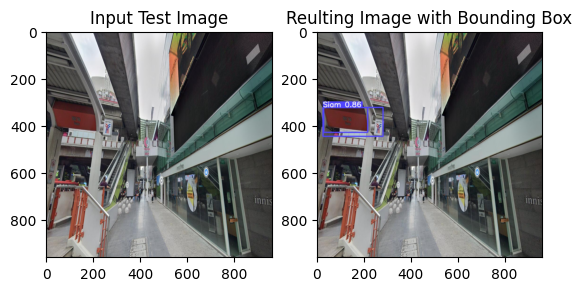

Predicted Station Names: Siam


In [12]:
# Test the YOLOv8 model with one image from the test set
best_yolo_model_path = os.path.join("models", "deep_learning", "best.pt")
best_yolo_model = YOLO(best_yolo_model_path)

# Load the image
input_test_image_path = os.path.join("data", "outputs", "test", "images", "Siam_001_png.rf.ea48fca9fc87c689e62db2f87c4e9df4.jpg")
input_test_img = cv2.imread(input_test_image_path)
# Convert the image to RGB
input_test_image = cv2.cvtColor(input_test_img, cv2.COLOR_BGR2RGB)

station_names_unique, new_resulting_image_path = predict_yolo_single_image(best_yolo_model, input_test_image)

# Load the image
output_image_path = os.path.join(new_resulting_image_path)
output_img = cv2.imread(output_image_path)
# Convert the image to RGB
# output_image = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

# Display the images
%matplotlib inline
plt.subplot(121)
plt.title('Input Test Image')
plt.imshow(input_test_image)
plt.subplot(122)
plt.title('Reulting Image with Bounding Box')
plt.imshow(output_img)
plt.show()

print(f"Predicted Station Names: {station_names_unique[0]}")

In [13]:
# Step B2: Train SVC model for detecting Bangkok Metro Station Signage

# Define the list of hyperparameter for cross validation
param_grid = {
    'kernel': ['rbf'],  # Type of kernel
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
    'tol': [1e-3, 1e-4]  # Tolerance for stopping criteria
}

best_svc_model, svc_cv_accuracy, svc_test_accuracy = train_svc(X_train_full_scaled, y_train_full, X_test_scaled, y_test, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}
Best Cross-validation Accuracy: 0.568607
Test Accuracy: 0.625899
Classification Report:
                   precision    recall  f1-score   support

     Chong_Nonsi       0.35      0.48      0.40        48
National_Stadium       0.66      0.60      0.63       126
     Ratchadamri       0.68      0.67      0.67       108
     Saint_Louis       0.71      0.48      0.58        66
      Sala_Daeng       0.66      0.67      0.67       138
   Saphan_Taksin       0.60      0.74      0.66       120
            Siam       0.64      0.70      0.67       138
         Surasak       0.66      0.46      0.54        90

        accuracy                           0.63       834
       macro avg       0.62      0.60      0.60       834
    weighted avg       0.64      0.63      0.63       834

Confusion Matrix:
 [[23  2  7  3  2 11  0  0]
 [ 4 76  0  1 16 12 16 

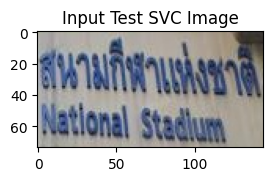

Predicted Station Name: National_Stadium


In [14]:
# Test the SVC model with one image from the cropped test set
best_svc_model_path = os.path.join("models", "classical_machine_learning", "best_svc_model.pkl")
best_svc_model = joblib.load(best_svc_model_path)

# Load the image
input_test_svc_image_path = os.path.join("data", "outputs", "test", "crops", "National_Stadium", "crop_10.jpg")
input_test_svc_img = cv2.imread(input_test_svc_image_path)
# Convert the image to RGB
input_test_svc_image = cv2.cvtColor(input_test_svc_img, cv2.COLOR_BGR2RGB)

station_name = predict_svc_single_image(best_svc_model, input_test_svc_image)

# Display the images
%matplotlib inline
plt.subplot(121)
plt.title('Input Test SVC Image')
plt.imshow(input_test_svc_image)
plt.show()

print(f"Predicted Station Name: {station_name}")

In [15]:
# Step B3: Evaluate naive model with option 1 
# Always predicts 'Siam', which has the highest ridership, according to the statistics from BTS, the metro operator.
naive_1_accuracy = predict_naive_evaluate_test_set(1, y_train_full, y_test)

Test Accuracy: 0.165468
Classification Report:
                   precision    recall  f1-score   support

     Chong_Nonsi       0.00      0.00      0.00        48
National_Stadium       0.00      0.00      0.00       126
     Ratchadamri       0.00      0.00      0.00       108
     Saint_Louis       0.00      0.00      0.00        66
      Sala_Daeng       0.00      0.00      0.00       138
   Saphan_Taksin       0.00      0.00      0.00       120
            Siam       0.17      1.00      0.28       138
         Surasak       0.00      0.00      0.00        90

        accuracy                           0.17       834
       macro avg       0.02      0.12      0.04       834
    weighted avg       0.03      0.17      0.05       834

Confusion Matrix:
 [[  0   0   0   0   0   0  48   0]
 [  0   0   0   0   0   0 126   0]
 [  0   0   0   0   0   0 108   0]
 [  0   0   0   0   0   0  66   0]
 [  0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0 120   0]
 [  0   0   0   0   0   

In [16]:
# Step B4: Evaluate naive model with option 2
# Randomly predicts one of the 8 stations, based on the frequency of the stations in the training set.
naive_2_accuracy = predict_naive_evaluate_test_set(2, y_train_full, y_test)

Station Frequency Distribution:

  Chong_Nonsi: 8.00%
  National_Stadium: 15.32%
  Ratchadamri: 11.45%
  Saint_Louis: 9.01%
  Sala_Daeng: 16.16%
  Saphan_Taksin: 14.98%
  Siam: 15.66%
  Surasak: 9.43%

Test Accuracy: 0.129496
Classification Report:
                   precision    recall  f1-score   support

     Chong_Nonsi       0.08      0.10      0.09        48
National_Stadium       0.14      0.15      0.14       126
     Ratchadamri       0.14      0.12      0.13       108
     Saint_Louis       0.10      0.11      0.10        66
      Sala_Daeng       0.15      0.14      0.15       138
   Saphan_Taksin       0.12      0.12      0.12       120
            Siam       0.14      0.13      0.13       138
         Surasak       0.13      0.12      0.13        90

        accuracy                           0.13       834
       macro avg       0.12      0.13      0.12       834
    weighted avg       0.13      0.13      0.13       834

Confusion Matrix:
 [[ 5 10  6  3  8  7  4  5]
 [13 